In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


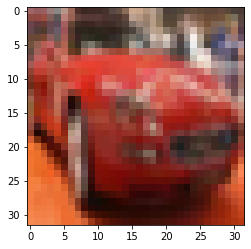

In [13]:
plt.imshow(x_train[5])

In [14]:
y_train[5]

array([1], dtype=uint8)

Data Preprocessing


In [15]:
x_train=x_train/255
x_test=x_test/255

In [17]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [18]:
from tensorflow.keras.utils import to_categorical


In [19]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [24]:
y_train_cat[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Building model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten

In [27]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))


model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor='val_loss')

In [33]:
model.fit(x_train,y_train_cat,epochs=150,validation_data=(x_test,y_test_cat),callbacks=[early_stop])

Epoch 1/150
1563/1563 [==============================] - 60s 39ms/step - loss: 1.5009 - accuracy: 0.4574 - val_loss: 1.2410 - val_accuracy: 0.5604
Epoch 2/150
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1754 - accuracy: 0.5835 - val_loss: 1.1155 - val_accuracy: 0.6004
Epoch 3/150
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0236 - accuracy: 0.6394 - val_loss: 1.0345 - val_accuracy: 0.6343
Epoch 4/150
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9163 - accuracy: 0.6798 - val_loss: 1.0201 - val_accuracy: 0.6498
Epoch 5/150
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8277 - accuracy: 0.7102 - val_loss: 1.0117 - val_accuracy: 0.6536
Epoch 6/150
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7464 - accuracy: 0.7383 - val_loss: 1.0113 - val_accuracy: 0.6570
Epoch 7/150
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6767 - accuracy: 0.7636 - val_loss: 1

In [34]:
model.history.history

{'accuracy': [0.45743998885154724,
  0.5835000276565552,
  0.6394199728965759,
  0.6797999739646912,
  0.7102000117301941,
  0.738319993019104,
  0.7635599970817566],
 'loss': [1.5008996725082397,
  1.1753711700439453,
  1.023583173751831,
  0.9162610173225403,
  0.8276751637458801,
  0.7463809251785278,
  0.6767296195030212],
 'val_accuracy': [0.5604000091552734,
  0.6003999710083008,
  0.6342999935150146,
  0.6498000025749207,
  0.6535999774932861,
  0.6570000052452087,
  0.6722000241279602],
 'val_loss': [1.2410380840301514,
  1.115525722503662,
  1.0344730615615845,
  1.020096778869629,
  1.0117323398590088,
  1.0113131999969482,
  1.0176270008087158]}

In [35]:
Loss=pd.DataFrame(model.history.history)

In [36]:
Loss


,loss,accuracy,val_loss,val_accuracy
0,1.500900,0.45744,1.241038,0.5604
1,1.175371,0.58350,1.115526,0.6004
2,1.023583,0.63942,1.034473,0.6343
3,0.916261,0.67980,1.020097,0.6498
4,0.827675,0.71020,1.011732,0.6536
5,0.746381,0.73832,1.011313,0.6570
6,0.676730,0.76356,1.017627,0.6722


Text(0.5, 1.0, 'Loss')

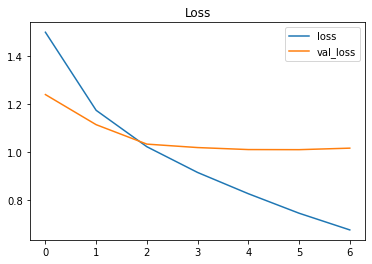

In [41]:
Loss[['loss','val_loss']].plot()
plt.title('Loss')

Text(0.5, 1.0, 'accuracy')

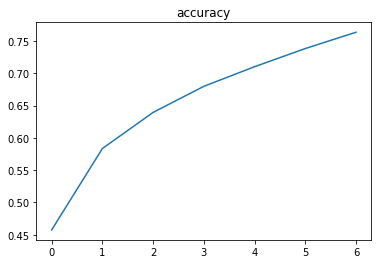

In [42]:
Loss['accuracy'].plot()
plt.title('accuracy')

In [45]:
x_test.shape


(10000, 32, 32, 3)

In [50]:
test_img=x_test[7]
test_img.shape

(32, 32, 3)

In [51]:
test_img=test_img.reshape(1,32,32,3)

In [55]:
test_img.shape

(1, 32, 32, 3)

In [56]:
model.predict_classes(test_img)
#predicts its class 6 which is frog

array([6])

In [57]:
y_test[7]
#Even the actual label is 6 then the predcition is correct 

array([6], dtype=uint8)

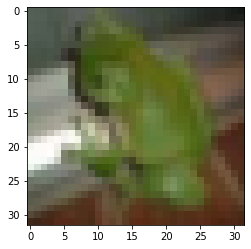

In [60]:
# to see the test image 
plt.imshow(test_img.reshape(32,32,3))
#Yes its frog

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
predictions = model.predict_classes(x_test)

In [63]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70      1000
           1       0.76      0.81      0.79      1000
           2       0.60      0.53      0.56      1000
           3       0.51      0.44      0.47      1000
           4       0.62      0.63      0.62      1000
           5       0.57      0.55      0.56      1000
           6       0.67      0.82      0.74      1000
           7       0.74      0.72      0.73      1000
           8       0.77      0.78      0.77      1000
           9       0.84      0.66      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

